In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from collections import Counter
import math
%matplotlib inline

### Question 1. 
The data given in the url is related with direct marketing campaigns of a banking
institution. The marketing campaigns were based on phone calls. Often, more
than one contact to the same client was required, in order to access if the product
(bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to
predict whether client will subscribe to term deposit \
[https://drive.google.com/open?id=1E0EURgsF3L9Bt5hnOalE0d4Tw9mIOgTn]

In [5]:
# Reading in the data
try:
    df = pd.read_csv("bank.csv", delimiter =';')
except Exception as e:
    print(f"Error : {e}")

In [6]:
df.shape

(4521, 17)

In [7]:
df.head()     # First 10 rows of the training data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Data Analysis

Understanding the data before processing and fitting the model

In [55]:
df.describe().T     # printing the analysis of the data in tabular form

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [56]:
# sn.pairplot(data=df, diag_kind='kde')

In [57]:
df.isna().any()     # Checking for any missing values in the data

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [58]:
df.isnull().sum()   # Checking for any null values in the data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [59]:
df.dtypes       # Understanding type of values in the data

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Data Preprocessing

In [60]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
559,47,technician,divorced,secondary,no,2914,yes,no,cellular,18,aug,405,13,-1,0,unknown,no
4008,41,entrepreneur,divorced,secondary,no,1588,yes,yes,unknown,20,jun,10,8,-1,0,unknown,no
2916,32,admin.,single,secondary,no,10218,yes,no,cellular,19,nov,149,2,-1,0,unknown,no
1830,36,services,single,secondary,no,774,yes,no,cellular,3,feb,231,2,259,1,failure,no
1073,30,management,single,tertiary,no,726,yes,no,cellular,16,apr,39,1,342,3,failure,no


Removing the columns which have less effect on the outcome to maximize the accuracy of the model 

In [61]:
df = df.drop(['marital', 'housing','education', 'contact', 'day', 'month', 'poutcome'], axis=1)

In [62]:
df.sample(5)

,age,job,default,balance,loan,duration,campaign,pdays,previous,y
645,46,self-employed,no,548,no,1181,4,-1,0,yes
4292,33,management,no,752,no,104,4,-1,0,no
3310,29,technician,no,2893,no,250,1,-1,0,no
2615,45,blue-collar,no,776,no,232,4,253,1,no
1004,24,blue-collar,no,204,yes,229,3,-1,0,no


In [63]:
df.replace(['yes','no'],[1.0,0],inplace=True)   # Replacing categories with numerical equivalent

In [64]:
# sn.pairplot(data=df, diag_kind='kde')

In [65]:
df.sample(5)

,age,job,default,balance,loan,duration,campaign,pdays,previous,y
1376,28,management,0.0,1466,0.0,40,1,-1,0,0.0
3373,28,admin.,0.0,14,0.0,201,1,-1,0,0.0
3849,27,blue-collar,0.0,362,0.0,332,2,-1,0,0.0
4472,29,blue-collar,0.0,200,0.0,322,2,-1,0,0.0
3329,34,management,0.0,13204,1.0,197,2,-1,0,0.0


In [66]:
df.nunique(axis = 0)    # Return Series with number of distinct elements. Can ignore NaN values.

age           67
job           12
default        2
balance     2353
loan           2
duration     875
campaign      32
pdays        292
previous      24
y              2
dtype: int64

In [67]:
df.shape    # Get the number of rows and columns in the dataframe

(4521, 10)

> pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [68]:
df = pd.get_dummies(df) # converting categorical data into dummy or indicator variables

In [69]:
df.sample(5)     

,age,default,balance,loan,duration,campaign,pdays,previous,y,job_admin.,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
4345,34,0.0,174,0.0,259,4,-1,0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
4247,32,0.0,0,0.0,9,6,-1,0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
416,31,0.0,2070,0.0,319,2,-1,0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
2390,24,0.0,366,1.0,234,2,-1,0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
222,49,0.0,365,0.0,59,2,-1,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df.shape    # Get the number of rows and columns in the dataframe

(4521, 21)

<AxesSubplot:>

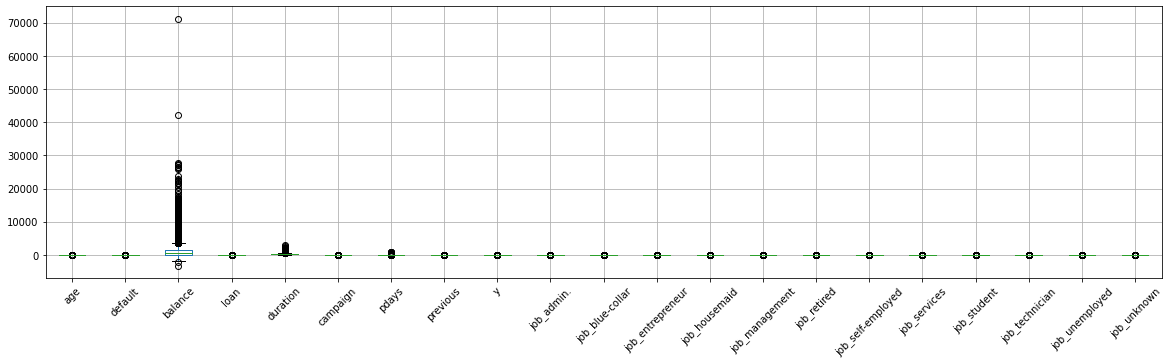

In [71]:
df.boxplot(rot=45, figsize=(20,5))      # Visualizing the data

In [72]:
df.skew()   # Checking for skewness before feature scaling

age                   0.699501
default               7.519405
balance               6.596431
loan                  1.930177
duration              2.772420
campaign              4.743914
pdays                 2.717071
previous              5.875259
y                     2.410736
job_admin.            2.565298
job_blue-collar       1.430050
job_entrepreneur      4.895427
job_housemaid         6.116887
job_management        1.392740
job_retired           4.089158
job_self-employed     4.664927
job_services          2.819328
job_student           7.132609
job_technician        1.758809
job_unemployed        5.689546
job_unknown          10.773076
dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
df.sample(2)

,age,default,balance,loan,duration,campaign,pdays,previous,y,job_admin.,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
3524,45,0.0,0,1.0,47,7,-1,0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
1996,58,0.0,1573,1.0,279,1,-1,0,0.0,0,...,0,0,1,0,0,0,0,0,0,0


### Train/Test Split and Feature Scaling

In [75]:
y_values = df['y']  # taking out the y values from the dataset

In [76]:
data = df.drop('y', axis = 1)   # taking out the y values from the dataset

In [77]:
def feature_scaling(dataframe,column):
    """
    
    Args:
        dataframe (_type_): _description_
        column (_type_): _description_

    Returns:
        _type_: _description_
    """
    dataframe[column] = np.divide(np.subtract(dataframe[column],dataframe[column].mean()),
                                  dataframe[column].std())
    return dataframe[column]

In [78]:
column = list(df.columns)
for item in column:
    df[item] = feature_scaling(df,item)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(data, y_values, test_size = 0.3)    # We are splitting the data into training and testing sets in 70:30 ratio

## Developing the K-Nearest Neighbor Algorithm

- k-Nearest Neighbors (KNN) is a supervised machine learning algorithm that can be used for either regression or classification tasks. 
- KNN is non-parametric, which means that the algorithm does not make assumptions about the underlying distributions of the data.
- KNN is a distance based approach
- KNN calculates the distance from all points in the proximity of the unknown data and filters out the ones with the shortest distances to it. As a result, it’s often referred to as a distance-based algorithm.
- Here, ‘K’ is the hyperparameter for KNN. For proper classification/prediction, the value of K must be fine-tuned.
- It is recommended to always select an odd value of K

For Classification -- 
> When the problem statement is of ‘classification’ type, KNN tends to use the concept of “Majority Voting”. Within the given range of K values, the class with the most votes is chosen.

For Regression -- 
> KNN employs a mean/average method for predicting the value of new data. Based on the value of K, it would consider all of the nearest neighbors.

###The KNN Algorithm

> 1. Load the data
> 2. Initialize K to your chosen number of neighbors
> 3. For each example in the data
>  - Calculate the distance between the query example and the current example from the data.
>  - Add the distance and the index of the example to an ordered collection
> 4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
> 5. Pick the first K entries from the sorted collection
> 6. Get the labels of the selected K entries
> 7. If regression, return the mean of the K labels
> 8. If classification, return the mode of the K labels

In [81]:
def distance_formula(value1, value2):
    sqrd_distance = 0
    for i in range(len(value1)): sqrd_distance += math.pow(value1[i] - value2[i], 2)
    return math.sqrt(sqrd_distance)

In [82]:
y_train

2025    0.0
2387    0.0
497     0.0
847     0.0
2294    0.0
       ... 
2243    0.0
2695    0.0
1191    0.0
411     0.0
3306    0.0
Name: y, Length: 3164, dtype: float64

In [83]:
len(X_train.iloc[:,0])

3164

In [84]:
# y1 = np.array(y_train)
# x1 = np.array(X_train.iloc[:,0])


In [85]:
# X_train, X_test, y_train, y_test
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [86]:
def nearest_neighbor(X_training, X_testing, y_training, y_testing, k):
    """_summary_

    Args:
        X_train (_type_): _description_
        X_test (_type_): _description_
        y_train (_type_): _description_
        y_test (_type_): _description_
        k (_type_): _description_

    Returns:
        _type_: _description_
    """
    y_test_output = []
    for test_point in X_testing:
        distances = []
        for train_point in X_training:
            distance = distance_formula(test_point, train_point)
            distances.append(distance)
        df_data = pd.DataFrame(data=distances, columns=['distance'], index=range(len(y_training)))
        # Sort distances, and only consider the k closest points
        df_nn = df_data.sort_values(by=['distance'], axis=0)[:k]
        counter = Counter(y_train[df_nn.index])     # Creating counter object to track the labels of k closest neighbors
        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        y_test_output.append(prediction)   # Appending predicted values to output list
        
    return y_test_output 

In [87]:
# X_train, X_test, y_train, y_test
try:
    y_hat_test = nearest_neighbor(X_train, X_test, y_train, y_test, k=20)
except Exception as e:
    print("The error is :",e)

In [88]:
print(y_hat_test)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

## Testing

In [89]:
try:
    x_test = np.array(X_test)
    y_test = np.array(y_test)
    y_result = np.array(y_hat_test)       # calculating the predicted values
except Exception as e:
    print(f'Error : {e}')

In [90]:
# function to check the accuracy of the prediction
def accuracy_check(y_predicted, y_data):
        p, e = y_predicted, y_data
        n = len(y_predicted)
        return 1-sum([abs(p[i]-e[i])/e[i] for i in range(n) if e[i] != 0])/n

In [91]:
print(f'The accuracy is : {accuracy_check(y_test, y_result)*100} %')

The accuracy is : 98.82092851879145 %
